In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score


In [2]:
mnist = pd.read_csv('train.csv')

In [3]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# get the first training record features and labels

somedigit = mnist.iloc[0,1:].values.reshape(28,28)
somedigit_label = mnist.loc[:,'label'].values[0]


the first digit is the number:  1


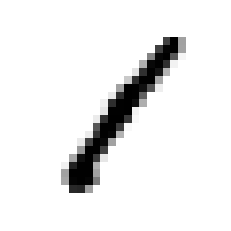

In [5]:
plt.imshow(somedigit, cmap='binary')
plt.axis('off');

print(f'the first digit is the number:  {somedigit_label}')

In [18]:
#separate features and labels od the training set

X, y = mnist.iloc[:,1:].values, mnist.iloc[:,0].values

In [19]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


In [20]:
# Split train and test


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [21]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [23]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)


/Users/pedrojunqueira/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [34]:
randomdigit = X_train[0]

In [36]:
y_train[0]

8

In [39]:
svm_clf.predict([randomdigit])

array([8])

In [40]:
randomdigit_scores = svm_clf.decision_function([randomdigit])
randomdigit_scores

array([[ 1.71660285,  4.76081606,  3.78595328,  7.28218609, -0.3034376 ,
         8.29353492,  1.72468213,  1.71676879,  9.31248883,  6.24261764]])

In [44]:
svm_clf.classes_[np.argmax(randomdigit_scores)]

8

In [26]:
# from sklearn.datasets import fetch_openml
# mnist2 = fetch_openml('mnist_784', version=1)
# mnist2['data'][0].dtype

In [45]:
# validation
cross_val_score(svm_clf, X_train, y_train, cv=3, scoring='accuracy')

/Users/pedrojunqueira/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pedrojunqueira/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/pedrojunqueira/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([0.92838111, 0.92793945, 0.92886092])

In [61]:
mnist_test = pd.read_csv('test.csv')

In [63]:
mnist_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
X_t = mnist_test.values

In [65]:
X_t = X_t.astype('float32')/255

In [68]:
svm_clf.predict([X_t[0]])

array([2])

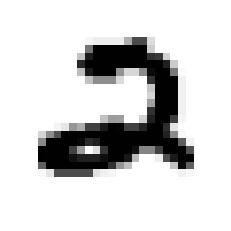

In [70]:
plt.imshow(X_t[0].reshape(28,28), cmap='binary')
plt.axis('off');


In [73]:
prediction = svm_clf.predict(X_t)

In [91]:
imageid = list(range(1,len(prediction)+1))

data = {'ImageId': imageid,'Label': prediction}


In [93]:
pd.DataFrame(data).to_csv('submission.csv',index=False)